### Các trường trong cột dữ liệu 
+ Country: Tên nước
+ Region: Khu vực của nước đó 
+ Happiness Rank: Xếp hạng mức độ hạnh phúc 
+ Happniness Score: Điểm hạnh phúc 
+ Standard Error: Độ không chắc chắn của giá trị score (càng lớn thì độ tin cậy càng thấp)
+ Economy (GPD trên đầu người): Mức thu nhập đầu người 
+ Family: Mức độ đóng góp của gia đình vào điểm số hạnh phúc 
+ Health (Life Expectancy): Tuổi thọ
+ Freedom: Mức độ đóng góp của tự do vào điểm số hạnh phúc 
+ Trust (Government Corruption): Niềm tin vào chính phủ, cơ quan chức năng 
+ Generosity: mức độ ước tính mà sự hào phóng góp phần vào điểm số hạnh phúc
+ Dystopia Residual: Thể hiện mức độ mà các yếu tố trên hoặc dưới giải thích điểm số hạnh phúc

#### Which factors contribute the most to the happiness score in the 2015 dataframe?

In [230]:
import pandas as pd 
import matplotlib.pyplot as plt

data_raw_2015 = pd.read_csv('wh_2015.csv')
data_raw_2016 = pd.read_csv('wh_2016.csv')
data_raw_2017 = pd.read_csv('wh_2017.csv')

# loại bỏ các row có nhiều hơn 3 giá trị trống
data_raw_2015 = data_raw_2015.dropna(thresh=len(data_raw_2015.columns) - 3, axis=0)
data_raw_2016 = data_raw_2016.dropna(thresh=len(data_raw_2016.columns) - 3, axis=0)
data_raw_2017 = data_raw_2017.dropna(thresh=len(data_raw_2017.columns) - 3, axis=0)

In [237]:
import pandas as pd 
import matplotlib.pyplot as plt

# 2015 
data_raw_2015 = pd.read_csv('wh_2015.csv')
data_raw_2015 = data_raw_2015.dropna(thresh=len(data_raw_2015.columns) - 3, axis=0)

list_columns = data_raw_2015.columns

# Thay thế các giá trị 0 bằng giá trị trung bình của cột
for col in ["Trust (Government Corruption)", "Generosity", "Dystopia Residual", "Freedom"]:
    col_mean = data_raw_2015[col].mean()
    data_raw_2015[col] = data_raw_2015[col].replace(0, col_mean)
        
for col in ["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)"]:
    index_col = data_raw_2015["Country"].loc[data_raw_2015[col] == 0].index[0]
    region = data_raw_2015.loc[index_col, "Region"]
    mean_economy = data_raw_2015.loc[data_raw_2015["Region"] == region, col].mean()
    data_raw_2015.loc[index_col, col] = mean_economy
    
data_corr = data_raw_2015.iloc[:, 3:12]
# 
data_corr.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.784179,0.743630,0.729281,0.572188,0.397175,0.176914,0.530474
Standard Error,-0.177254,1.000000,-0.223741,-0.110752,-0.305046,-0.128462,-0.188923,-0.087525,0.083981
Economy (GDP per Capita),0.784179,-0.223741,1.000000,0.642285,0.813903,0.382075,0.308578,-0.000919,0.048882
Family,0.743630,-0.110752,0.642285,1.000000,0.515622,0.468668,0.208221,0.089451,0.176812
Health (Life Expectancy),0.729281,-0.305046,0.813903,0.515622,1.000000,0.372380,0.249910,0.122263,0.024745
Freedom,0.572188,-0.128462,0.382075,0.468668,0.372380,1.000000,0.510124,0.350630,0.059583
Trust (Government Corruption),0.397175,-0.188923,0.308578,0.208221,0.249910,0.510124,1.000000,0.284375,-0.036503
Generosity,0.176914,-0.087525,-0.000919,0.089451,0.122263,0.350630,0.284375,1.000000,-0.108955
Dystopia Residual,0.530474,0.083981,0.048882,0.176812,0.024745,0.059583,-0.036503,-0.108955,1.000000


In [241]:
import pandas as pd 
import matplotlib.pyplot as plt

# 2016 
data_raw_2016 = pd.read_csv('wh_2016.csv')
data_raw_2016 = data_raw_2016.dropna(thresh=len(data_raw_2016.columns) - 3, axis=0)

list_columns = data_raw_2016.columns

# Thay thế các giá trị 0 bằng giá trị trung bình của cột
for col in ["Trust (Government Corruption)", "Generosity", "Freedom"]:
    col_mean = data_raw_2016[col].mean()
    data_raw_2016[col] = data_raw_2016[col].replace(0, col_mean)
        
for col in ["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)"]:
    index_col = data_raw_2016["Country"].loc[data_raw_2016[col] == 0].index[0]
    region = data_raw_2016.loc[index_col, "Region"]
    mean_economy = data_raw_2016.loc[data_raw_2016["Region"] == region, col].mean()
    data_raw_2016.loc[index_col, col] = mean_economy
    
data_corr = data_raw_2016.iloc[:, 3:13]
# 
data_corr.corr()

,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.999485,0.999474,0.801038,0.733093,0.770942,0.560917,0.402506,0.154945,0.543738
Lower Confidence Interval,0.999485,1.000000,0.997919,0.801267,0.735432,0.774630,0.559432,0.405335,0.156173,0.538793
Upper Confidence Interval,0.999474,0.997919,1.000000,0.799969,0.729963,0.766409,0.561831,0.399228,0.153542,0.548164
Economy (GDP per Capita),0.801038,0.801267,0.799969,1.000000,0.659660,0.834618,0.371909,0.310838,-0.016047,0.090339
Family,0.733093,0.735432,0.729963,0.659660,1.000000,0.588151,0.471656,0.212975,0.083704,0.117849
Health (Life Expectancy),0.770942,0.774630,0.766409,0.834618,0.588151,1.000000,0.330792,0.255923,0.090142,0.110796
Freedom,0.560917,0.559432,0.561831,0.371909,0.471656,0.330792,1.000000,0.494258,0.339757,0.086968
Trust (Government Corruption),0.402506,0.405335,0.399228,0.310838,0.212975,0.255923,0.494258,1.000000,0.303824,-0.000593
Generosity,0.154945,0.156173,0.153542,-0.016047,0.083704,0.090142,0.339757,0.303824,1.000000,-0.138693
Dystopia Residual,0.543738,0.538793,0.548164,0.090339,0.117849,0.110796,0.086968,-0.000593,-0.138693,1.000000


In [244]:
import pandas as pd 
import matplotlib.pyplot as plt

# 2017 
data_raw_2017 = pd.read_csv('wh_2017.csv')
data_raw_2017 = data_raw_2017.dropna(thresh=len(data_raw_2017.columns) - 3, axis=0)

list_columns = data_raw_2017.columns

# Thay thế các giá trị 0 bằng giá trị trung bình của cột
for col in ["Trust..Government.Corruption.", "Generosity", "Freedom"]:
    col_mean = data_raw_2017[col].mean()
    data_raw_2017[col] = data_raw_2017[col].replace(0, col_mean)
        
for col in ["Economy..GDP.per.Capita.", "Family", "Health..Life.Expectancy."]:
    index_col = data_raw_2017["Country"].loc[data_raw_2017[col] == 0].index[0]
    country = data_raw_2017.loc[index_col, "Country"]
    mean_economy = data_raw_2017.loc[data_raw_2017["Country"] == country, col].mean()
    data_raw_2017.loc[index_col, col] = mean_economy
    
data_corr = data_raw_2017.iloc[:, 2:12]
# 
data_corr.corr()

,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Happiness.Score,1.000000,0.999497,0.999520,0.812469,0.752737,0.781951,0.559496,0.155636,0.429950,0.475355
Whisker.high,0.999497,1.000000,0.998036,0.811868,0.750934,0.776634,0.559923,0.155829,0.427274,0.478824
Whisker.low,0.999520,0.998036,1.000000,0.812267,0.753767,0.786385,0.558536,0.155297,0.432146,0.471505
Economy..GDP.per.Capita.,0.812469,0.811868,0.812267,1.000000,0.688296,0.843077,0.373746,-0.010512,0.352595,0.024226
Family,0.752737,0.750934,0.753767,0.688296,1.000000,0.612080,0.430335,0.054384,0.229672,0.070506
Health..Life.Expectancy.,0.781951,0.776634,0.786385,0.843077,0.612080,1.000000,0.320263,0.077028,0.286231,0.054963
Freedom,0.559496,0.559923,0.558536,0.373746,0.430335,0.320263,1.000000,0.281433,0.493471,0.075436
Generosity,0.155636,0.155829,0.155297,-0.010512,0.054384,0.077028,0.281433,1.000000,0.294150,-0.120357
Trust..Government.Corruption.,0.429950,0.427274,0.432146,0.352595,0.229672,0.286231,0.493471,0.294150,1.000000,-0.022202
Dystopia.Residual,0.475355,0.478824,0.471505,0.024226,0.070506,0.054963,0.075436,-0.120357,-0.022202,1.000000


#### How can aggregating the data give us more insight into happiness scores?
+ Tính trung bình điểm số hạnh phúc. Có thể tính trung bình cho toàn bộ dữ liệu hoặc theo nhóm, chẳng hạn như theo GDP, v.v.
+ Tính toán giá trị trung vị và phương sai của điểm số hạnh phúc. Việc tính toán này cho ta biết được các giá trị trung bình của dữ liệu và độ phân tán của chúng.
+ Tính toán tần suất của các giá trị điểm số hạnh phúc. Việc tính toán này có thể giúp ta biết được phân bố của điểm số hạnh phúc trong dữ liệu.
+ Tính toán các mối tương quan giữa điểm số hạnh phúc và các yếu tố khác. Việc tính toán này cho ta biết được mức độ tương quan giữa điểm số hạnh phúc và các yếu tố khác, chẳng hạn như GDP, v.v.
+ Tạo biểu đồ để hiển thị các kết quả dưới dạng trực quan. Có thể sử dụng biểu đồ cột, biểu đồ đường, biểu đồ phân phối, biểu đồ tương quan, v.v.

In [245]:
import pandas as pd 
import matplotlib.pyplot as plt

data_raw_2015 = pd.read_csv('wh_2015.csv')
data_raw_2016 = pd.read_csv('wh_2016.csv')
data_raw_2017 = pd.read_csv('wh_2017.csv')

# loại bỏ các row có nhiều hơn 3 giá trị trống
data_raw_2015 = data_raw_2015.dropna(thresh=len(data_raw_2015.columns) - 3, axis=0)
data_raw_2016 = data_raw_2016.dropna(thresh=len(data_raw_2016.columns) - 3, axis=0)
data_raw_2017 = data_raw_2017.dropna(thresh=len(data_raw_2017.columns) - 3, axis=0)

In [252]:
# giá trị trung bình của các yếu tố năm 2015
data_raw_2015.iloc[:, 3:12].mean()

Happiness Score                  5.375734
Standard Error                   0.047885
Economy (GDP per Capita)         0.846137
Family                           0.991046
Health (Life Expectancy)         0.630259
Freedom                          0.428615
Trust (Government Corruption)    0.143422
Generosity                       0.237296
Dystopia Residual                2.098977
dtype: float64

In [256]:
# giá trị trung bình của các yếu tố năm 2016
data_raw_2016.iloc[:, 3:13].mean()

Happiness Score                  5.382185
Lower Confidence Interval        5.282395
Upper Confidence Interval        5.481975
Economy (GDP per Capita)         0.953880
Family                           0.793621
Health (Life Expectancy)         0.557619
Freedom                          0.370994
Trust (Government Corruption)    0.137624
Generosity                       0.242635
Dystopia Residual                2.325807
dtype: float64

In [257]:
# giá trị trung bình của các yếu tố năm 2017
data_raw_2017.iloc[:, 2:12].mean()

Happiness.Score                  5.354019
Whisker.high                     5.452326
Whisker.low                      5.255713
Economy..GDP.per.Capita.         0.984718
Family                           1.188898
Health..Life.Expectancy.         0.551341
Freedom                          0.408786
Generosity                       0.246883
Trust..Government.Corruption.    0.123120
Dystopia.Residual                1.850238
dtype: float64

In [258]:
# Tính trung vị của các yếu tố năm 2015
data_raw_2015.iloc[:, 3:12].median()

Happiness Score                  5.232500
Standard Error                   0.043940
Economy (GDP per Capita)         0.910245
Family                           1.029510
Health (Life Expectancy)         0.696705
Freedom                          0.435515
Trust (Government Corruption)    0.107220
Generosity                       0.216130
Dystopia Residual                2.095415
dtype: float64

In [259]:
# Tính trung vị của các yếu tố năm 2016
data_raw_2016.iloc[:, 3:13].median()

Happiness Score                  5.31400
Lower Confidence Interval        5.23700
Upper Confidence Interval        5.41900
Economy (GDP per Capita)         1.02780
Family                           0.84142
Health (Life Expectancy)         0.59659
Freedom                          0.39747
Trust (Government Corruption)    0.10547
Generosity                       0.22245
Dystopia Residual                2.29074
dtype: float64

In [260]:
# Tính trung vị của các yếu tố năm 2017
data_raw_2017.iloc[:, 2:12].median()

Happiness.Score                  5.279000
Whisker.high                     5.370032
Whisker.low                      5.193152
Economy..GDP.per.Capita.         1.064578
Family                           1.253918
Health..Life.Expectancy.         0.606042
Freedom                          0.437454
Generosity                       0.231538
Trust..Government.Corruption.    0.089848
Dystopia.Residual                1.832910
dtype: float64

In [261]:
# Tính phương sai của các yếu tố năm 2015
data_raw_2015.iloc[:, 3:12].var()

Happiness Score                  1.311048
Standard Error                   0.000294
Economy (GDP per Capita)         0.162506
Family                           0.074185
Health (Life Expectancy)         0.061047
Freedom                          0.022708
Trust (Government Corruption)    0.014408
Generosity                       0.016049
Dystopia Residual                0.306417
dtype: float64

In [262]:
# Tính phương sai của các yếu tố năm 2016
data_raw_2016.iloc[:, 3:13].var()

Happiness Score                  1.303418
Lower Confidence Interval        1.318002
Upper Confidence Interval        1.291617
Economy (GDP per Capita)         0.170235
Family                           0.071132
Health (Life Expectancy)         0.052601
Freedom                          0.021172
Trust (Government Corruption)    0.012329
Generosity                       0.017891
Dystopia Residual                0.294003
dtype: float64

In [263]:
# Tính phương sai của các yếu tố năm 2017
data_raw_2017.iloc[:, 2:12].var()

Happiness.Score                  1.279682
Whisker.high                     1.251136
Whisker.low                      1.311093
Economy..GDP.per.Capita.         0.177067
Family                           0.082520
Health..Life.Expectancy.         0.056203
Freedom                          0.022499
Generosity                       0.018166
Trust..Government.Corruption.    0.010335
Dystopia.Residual                0.250028
dtype: float64

array([[<Axes: title={'center': 'Happiness.Rank'}>,
        <Axes: title={'center': 'Happiness.Score'}>,
        <Axes: title={'center': 'Whisker.high'}>],
       [<Axes: title={'center': 'Whisker.low'}>,
        <Axes: title={'center': 'Economy..GDP.per.Capita.'}>,
        <Axes: title={'center': 'Family'}>],
       [<Axes: title={'center': 'Health..Life.Expectancy.'}>,
        <Axes: title={'center': 'Freedom'}>,
        <Axes: title={'center': 'Generosity'}>],
       [<Axes: title={'center': 'Trust..Government.Corruption.'}>,
        <Axes: title={'center': 'Dystopia.Residual'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

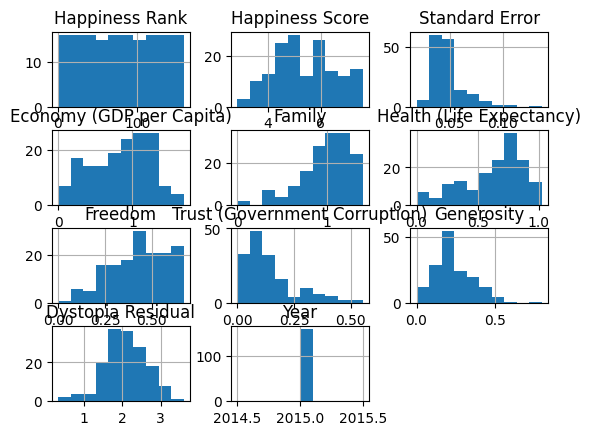

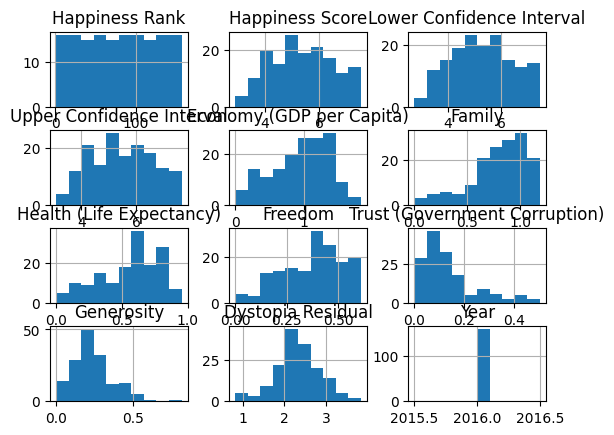

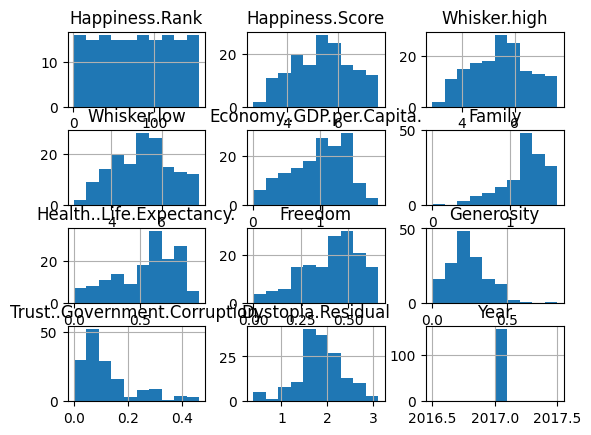

In [266]:
# biểu đồ phân phối cho dataframe 2015
data_raw_2015.hist()

# biểu đồ phân phối cho dataframe 2016
data_raw_2016.hist()

# biểu đồ phân phối cho dataframe 2017
data_raw_2017.hist()

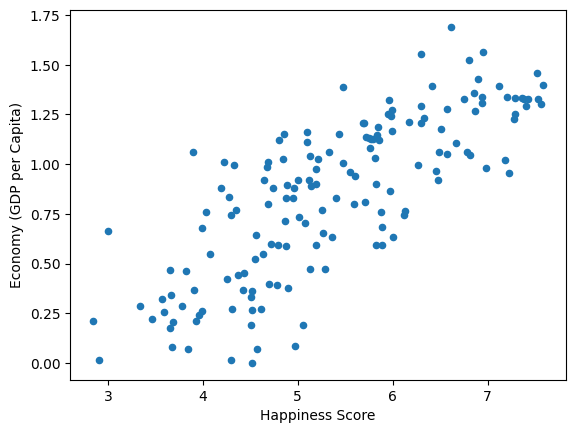

In [267]:
# Vẽ biểu đồ tương quan giữa Happiness Score và Economy (GDP per Capita)
data_raw_2015.plot.scatter(x="Happiness Score", y="Economy (GDP per Capita)")
plt.show()

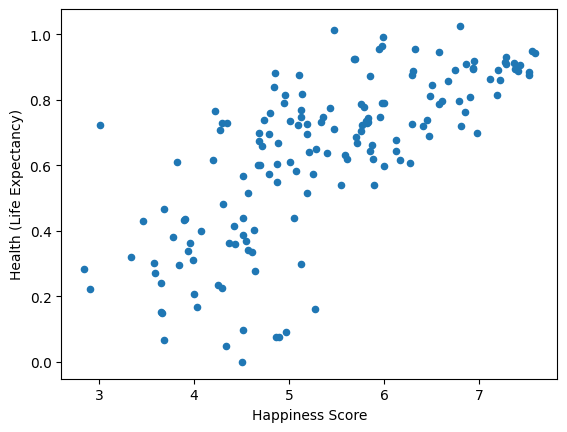

In [268]:
# Vẽ biểu đồ tương quan giữa Happiness Score và Health (Life Expectancy)
data_raw_2015.plot.scatter(x="Happiness Score", y="Health (Life Expectancy)")
plt.show()

#### Calculate the happiness of countries by regions, and then determine the correlation between that region and the whole world.

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt

data_raw_2015 = pd.read_csv('wh_2015.csv')
data_raw_2016 = pd.read_csv('wh_2016.csv')
data_raw_2017 = pd.read_csv('wh_2017.csv')

# loại bỏ các row có nhiều hơn 3 giá trị trống
# data_raw_2015 = data_raw_2015.dropna(thresh=len(data_raw_2015.columns) - 3, axis=0)
# data_raw_2016 = data_raw_2016.dropna(thresh=len(data_raw_2016.columns) - 3, axis=0)
# data_raw_2017 = data_raw_2017.dropna(thresh=len(data_raw_2017.columns) - 3, axis=0)
    
# Đổi tên các cột
data_raw_2017.columns = ['Country', 'Happiness Rank', 'Happiness Score', 'Whisker high',
       'Whisker low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual', 'Year']

In [120]:
# Tính giá trị hạnh phúc theo khu vực năm 2015
happiness_score_2015 = data_raw_2015.groupby("Region")["Happiness Score"].mean()
print(happiness_score_2015)

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


In [121]:
# Tính giá trị hạnh phúc trung bình trên toàn thế giới
print("Mean of Happiness Scores 2015 all around the world: ", data_raw_2015["Happiness Score"].mean())

Mean of Happiness Scores 2015 all around the world:  5.37573417721519


In [122]:
# Tính giá trị hạnh phúc theo khu vực năm 2016
happiness_score_2016 = data_raw_2016.groupby("Region")["Happiness Score"].mean()
print(happiness_score_2016)

Region
Australia and New Zealand          7.323500
Central and Eastern Europe         5.370690
Eastern Asia                       5.624167
Latin America and Caribbean        6.101750
Middle East and Northern Africa    5.386053
North America                      7.254000
Southeastern Asia                  5.338889
Southern Asia                      4.563286
Sub-Saharan Africa                 4.136421
Western Europe                     6.685667
Name: Happiness Score, dtype: float64


In [124]:
# Tính giá trị hạnh phúc trung bình trên toàn thế giới
print("Mean of Happiness Scores 2016 all around the world: ", data_raw_2016["Happiness Score"].mean())

Mean of Happiness Scores 2016 all around the world:  5.382184713375795


In [125]:
# Tính giá trị hạnh phúc trung bình trên toàn thế giới
print("Mean of Happiness Scores 2017 all around the world: ", data_raw_2017["Happiness Score"].mean())

Mean of Happiness Scores 2017 all around the world:  5.354019355773926


#### How many ways are there to merge data frames? and Combine 2015, 2016 and 2017 dataframes (Kết hợp các khung dữ liệu 2015, 2016 và 2017) 
+ merge()
+ join()
+ concat()
+ append()
+ combine()

In [153]:
# merge()
df = pd.merge(data_raw_2015, data_raw_2016, on=["Country", "Region"], how="inner", suffixes=("_2015", "_2016"))

df_merge = pd.merge(df, data_raw_2017, on=["Country"], how="inner", suffixes=(".", "_2017"))

df_merge.info()
# print(df_merge.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             148 non-null    object 
 1   Region                              148 non-null    object 
 2   Happiness Rank_2015                 148 non-null    float64
 3   Happiness Score_2015                148 non-null    float64
 4   Standard Error                      148 non-null    float64
 5   Economy (GDP per Capita)_2015       148 non-null    float64
 6   Family_2015                         148 non-null    float64
 7   Health (Life Expectancy)_2015       148 non-null    float64
 8   Freedom_2015                        148 non-null    float64
 9   Trust (Government Corruption)_2015  148 non-null    float64
 10  Generosity_2015                     148 non-null    float64
 11  Dystopia Residual_2015              148 non-n

In [155]:
# join
df1 = data_raw_2015.join(data_raw_2016, lsuffix="_2015", rsuffix="_2016")

df_join = df1.join(data_raw_2017, lsuffix="", rsuffix="_2017")

print(df_join.info())
# print(df_join.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 0 to 157
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country_2015                        158 non-null    object 
 1   Region_2015                         158 non-null    object 
 2   Happiness Rank_2015                 158 non-null    float64
 3   Happiness Score_2015                158 non-null    float64
 4   Standard Error                      158 non-null    float64
 5   Economy (GDP per Capita)_2015       158 non-null    float64
 6   Family_2015                         158 non-null    float64
 7   Health (Life Expectancy)_2015       158 non-null    float64
 8   Freedom_2015                        158 non-null    float64
 9   Trust (Government Corruption)_2015  158 non-null    float64
 10  Generosity_2015                     158 non-null    float64
 11  Dystopia Residual_2015              158 non-null  

- Nếu các cặp columns có giá trị càng gần 1 thì nếu column này xuất hiện thì column kia khả năng cao sẽ xuất hiện  
- Nếu các cặp columns có giá trị gần bằng 0 thì 2 columns không có mối tương quan về missing data 
- Nếu các cặp columns có giá trị gần bằng -1 thì thì nếu column này xuất hiện thì column khả năng cao sẽ bị missing data
--> Với biểu đồ bên trên, dễ thấy các cột Whisker low, Whisker high có mối tương quan với Region khá thấp, nghĩa là nếu cột Region xuất hiện thì khả năng cao 2 cột kia sẽ bị missing data, điều này hoàn toàn đúng khi data_raw_2017 chứa 2 cột Whisker high, Whisker low và không chứa cột Region. Tương tự với Whisker high và Whisker low cho giá trị 1, nghĩa là khi whisker high xuất hiện thì bao giờ whisker low cũng sẽ xuất hiện. 

#### How did world happiness change from 2015 to 2017? (Hạnh phúc thế giới đã thay đổi như thế nào từ năm 2015 đến năm 2017?)
+ Nhận xét: Điểm số hạnh phúc qua 3 năm có biến động, nhưng thay đổi không ổn định, năm 2016 thì tăng nhưng đến năm 2017 thì giảm

In [151]:
happiness_score_15 = data_raw_2015["Happiness Score"].mean()
happiness_score_16 = data_raw_2016["Happiness Score"].mean()
happiness_score_17 = data_raw_2017["Happiness Score"].mean()

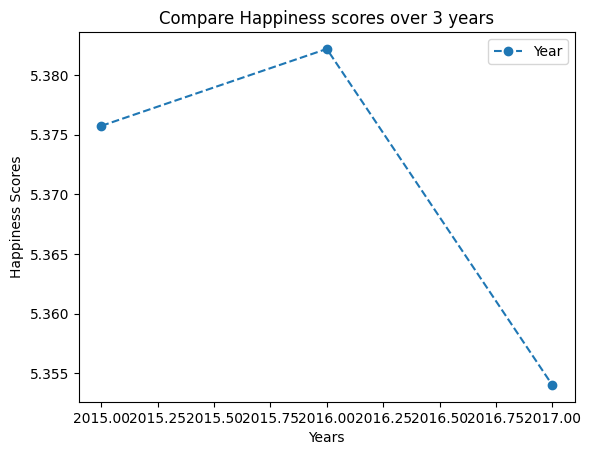

In [152]:
import pandas as pd

# Tạo dữ liệu giả
years = [2015, 2016, 2017]
values = [happiness_score_15, happiness_score_16, happiness_score_17]
df = pd.DataFrame({'Year': values}, index=years)

# Vẽ đường nối các điểm
ax = df.plot(marker='o', linestyle='--')

# Đặt tên cho các trục và tiêu đề
ax.set_xlabel('Years')
ax.set_ylabel('Happiness Scores')
ax.set_title('Compare Happiness scores over 3 years')

# Hiển thị biểu đồ
plt.show()

#### Show where these missing values are located by visualizing them with a heatmap

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

data_raw_2015 = pd.read_csv('wh_2015.csv')
data_raw_2016 = pd.read_csv('wh_2016.csv')
data_raw_2017 = pd.read_csv('wh_2017.csv')

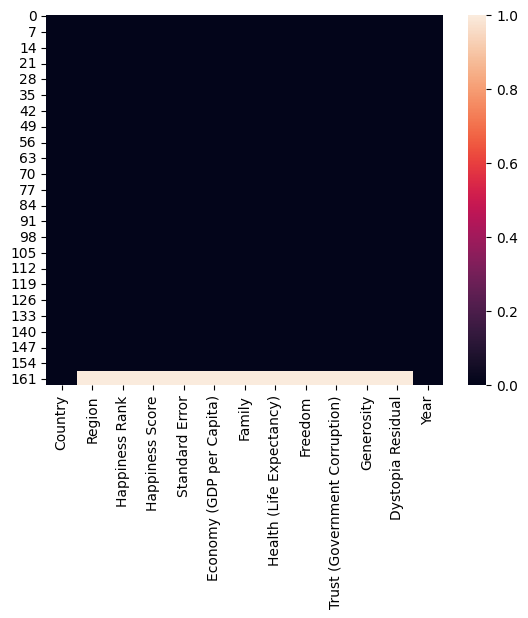

In [2]:
# Vẽ biểu đồ heatmap với pandas
sns.heatmap(data_raw_2015.isna())
plt.show()

In [3]:
data_raw_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        164 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    float64
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           164 non-null    int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        492 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 470 non-null    float64
 3   Happiness Score                470 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       470 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       470 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  470 non-null    float64
 10  Generosity                     470 non-null    float64
 11  Dystopia Residual              470 non-null    float64
 12  Year                           492 non-null    int

<Axes: >

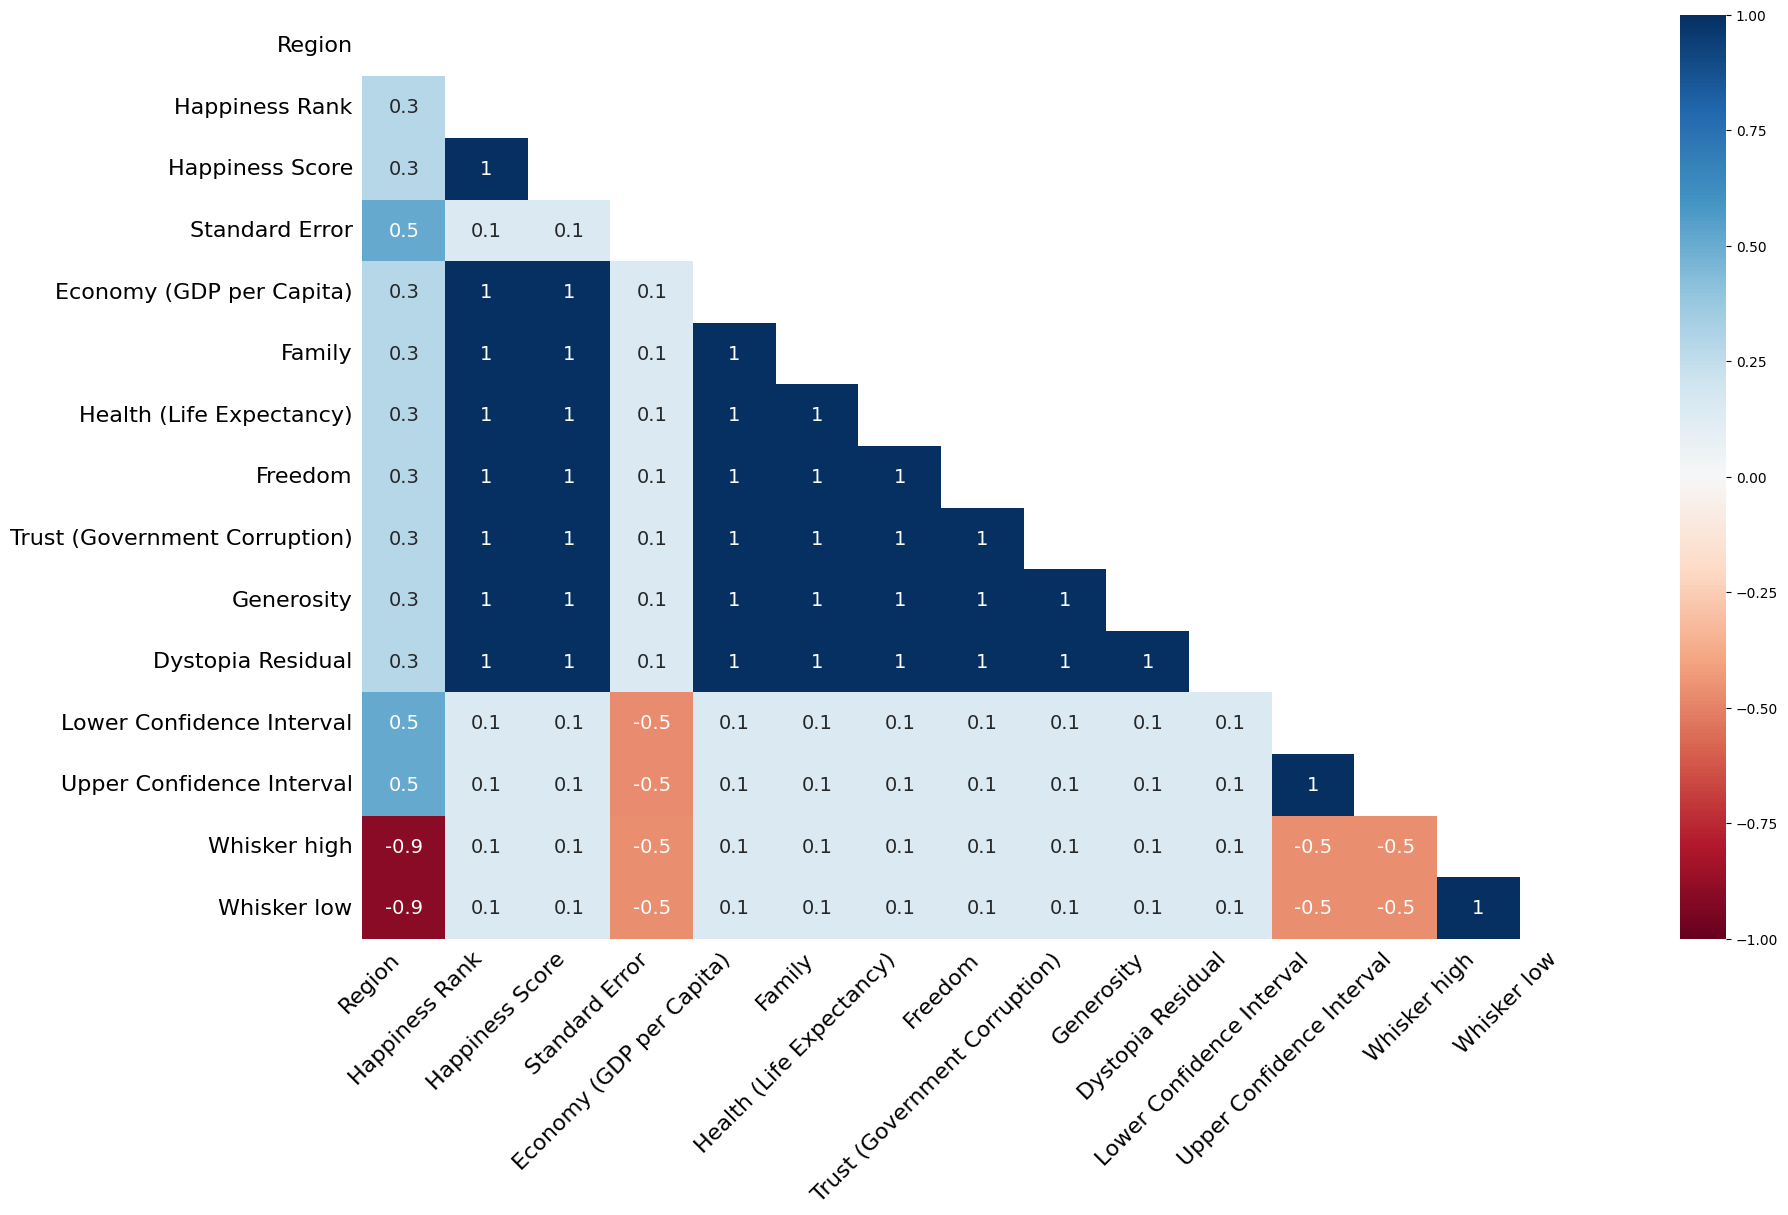

In [30]:
import missingno as msno
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

data_raw_2015 = pd.read_csv('wh_2015.csv')
data_raw_2016 = pd.read_csv('wh_2016.csv')
data_raw_2017 = pd.read_csv('wh_2017.csv')

data_raw_2017.columns = ['Country', 'Happiness Rank', 'Happiness Score', 'Whisker high',
       'Whisker low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual', 'Year']

# concat 
df_concat = pd.concat([data_raw_2015, data_raw_2016, data_raw_2017], keys="Year",ignore_index=True)

print(df_concat.info())
# print(df_concat)
msno.heatmap(df_concat)

#### How will removing or replacing the missing values affect our analysis?

In [27]:
# tính tổng số giá trị thiếu
total_missing = data_raw_2015.isna().sum().sum() + data_raw_2016.isna().sum().sum() + data_raw_2017.isna().sum().sum()

# lấy kích thước của DataFrame
total_values = data_raw_2015.size + data_raw_2016.size + data_raw_2017.size

percentage_of_the_data_missing = (total_missing / total_values) * 100

print('Tổng số giá trị thiếu trong DataFrame là:', total_missing)
print('Tổng số ô giá trị trong DataFrame là:', total_values)
print("Phần trăm missing data là: {:.2f}".format(percentage_of_the_data_missing))

Tổng số giá trị thiếu trong DataFrame là: 249
Tổng số ô giá trị trong DataFrame là: 6560
Phần trăm missing data là: 3.80


- Việc loại bỏ các giá trị bị thiếu hoàn toàn có thể khiến chúng ta mất thông tin có giá trị cho các cột khác. Bởi vì trong columns, có những columns có độ tương quan lớn với columns mà ta quan tâm, vì vậy sẽ dẫn việc mất thông tin giá trị. 

#### Can we identify any patterns in the missing data?
1. Để xác định các mẫu hoặc xu hướng trong dữ liệu bị thiếu, chúng ta có thể sử dụng các phương pháp như:
    + Tạo heatmap: Tạo ra một biểu đồ heatmap để trực quan hóa sự phân bố các giá trị thiếu trong mỗi cột của DataFrame. Các cột có tỷ lệ giá trị thiếu cao có thể được xem như có một xu hướng dữ liệu bị thiếu.
    + Sử dụng đồ thị: Sử dụng đồ thị để trực quan hóa các giá trị thiếu và các giá trị còn lại của các cột. Điều này có thể giúp xác định các mẫu hoặc xu hướng trong dữ liệu bị thiếu.
    + Sử dụng phân tích đa biến: Phân tích đa biến giúp xác định mối tương quan giữa các cột và các giá trị thiếu. Nếu các cột có mối tương quan cao và cùng có giá trị thiếu, thì có thể xem như có một mẫu dữ liệu bị thiếu trong các cột đó.

### Tổng hợp Dataframe 

In [11]:
import pandas as pd 

data_raw_2015 = pd.read_csv('wh_2015.csv')
data_raw_2016 = pd.read_csv('wh_2016.csv')
data_raw_2017 = pd.read_csv('wh_2017.csv')

data_raw_2017.columns = ['Country', 'Happiness Rank', 'Happiness Score', 'Whisker high',
       'Whisker low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual', 'Year']

# concat 
df_concat = pd.concat([data_raw_2015, data_raw_2016, data_raw_2017], keys="Year",ignore_index=True)

# chuyển columns "Year" sang cùng bên phải
df_concat = df_concat.assign(**{"Year": df_concat.pop("Year")})

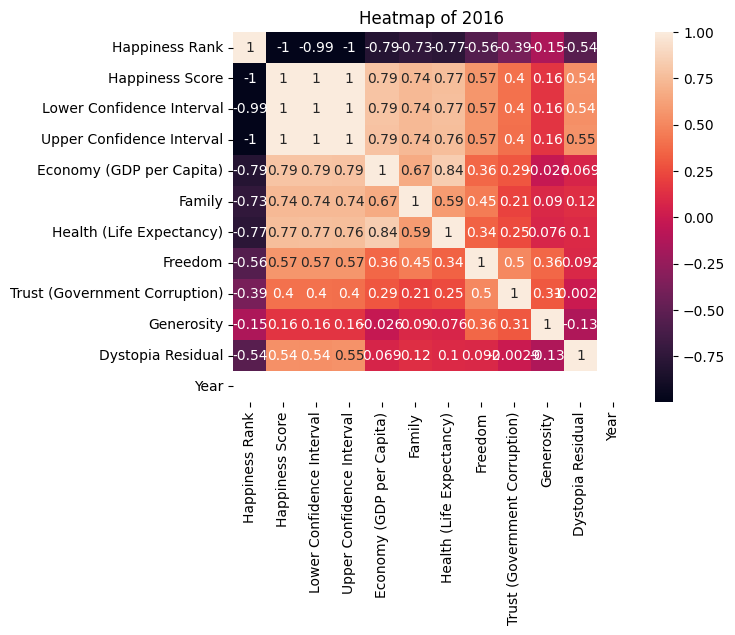

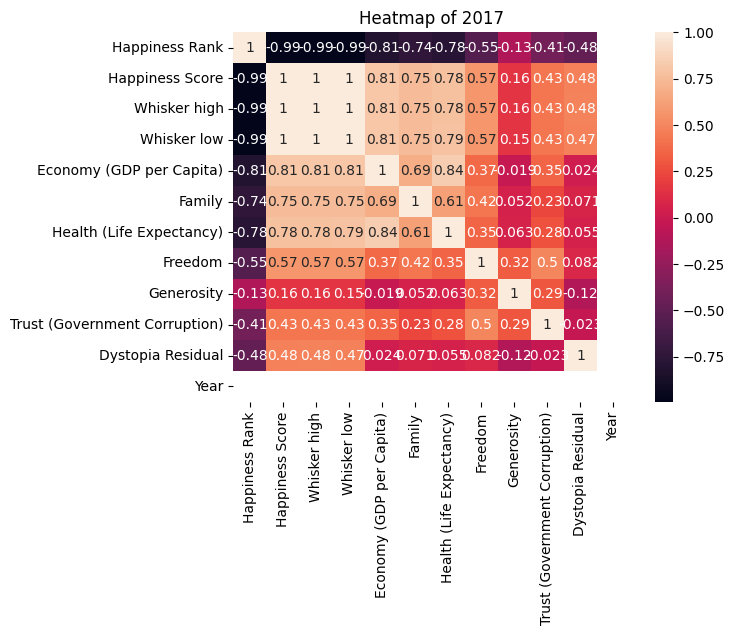

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

""" nhận thấy giá có 4 cột có giá trị null chiếm 2/3 tổng số giá trị trong cột. Trong trường hợp này, có 2 hướng 
   để xử lý. 1: Xóa các cột đó - trước khi xóa, phải kiểm tra độ tương quan của cột với giá trị "Happiness Score",
   nếu như mối tương quan thấp, ta có thể xóa. 2: Sử dụng phương pháp hồi quy tuyến tính, và phân tích đa biến""" 

# xét tương quan trong dataframe
data_raw_2016_corr = data_raw_2016.iloc[:, 2:].corr()
data_raw_2017_corr = data_raw_2017.iloc[:, 1:].corr()

# Vẽ heatmap
sns.heatmap(data_raw_2016_corr, annot=True)
plt.title("Heatmap of 2016")
plt.show()
sns.heatmap(data_raw_2017_corr, annot=True)
plt.title("Heatmap of 2017")
plt.show()

In [271]:
import pandas as pd 
import numpy as np 

data_raw_2015 = pd.read_csv('wh_2015.csv')
data_raw_2016 = pd.read_csv('wh_2016.csv')
data_raw_2017 = pd.read_csv('wh_2017.csv')

data_raw_2017.columns = ['Country', 'Happiness Rank', 'Happiness Score', 'Whisker high',
       'Whisker low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual', 'Year']

# concat 
df_concat = pd.concat([data_raw_2015, data_raw_2016, data_raw_2017], keys="Year",ignore_index=True)

# chuyển columns "Year" sang cùng bên phải
df_concat = df_concat.assign(**{"Year": df_concat.pop("Year")})

In [415]:
# xử lý data_raw_2017
df_2017 = data_raw_2017.copy()

country_region = pd.concat([data_raw_2015.iloc[:, [0, 1]].dropna(), data_raw_2016.iloc[:, [0, 1]].dropna()], axis=0).reset_index(drop=True).dropna().drop_duplicates()

df_full_2017 = df_2017.merge(country_region, on="Country", how="left")

region_column = df_full_2017.pop("Region")
df_full_2017.insert(1, "Region", region_column)

# fill missing data
"""nhận thấy chỉ số Happiness.Score, Whisker.high, Whisker.low có mức độ tương quan khá cao với GDP, --> fill missing data ở 3 cột này với mean của khu vực của chúng"""
# lấy ra các khu vực chứa nan 
list_region_nan = df_full_2017.loc[df_full_2017["Happiness Score"].isna(), "Region"].drop_duplicates().values.tolist()

# lấy ra các nước chứa nan
list_country_nan = df_full_2017.loc[df_full_2017["Happiness Score"].isna(), "Country"].values.tolist()

# lấy ra list các columns
list_columns = df_full_2017.columns[4:13].values.tolist()

list_values_fill = []

# fill các giá trị nan 
for country in list_country_nan: 
    list_values = []
    
    # thêm các quốc gia có giá trị nan
    list_values.append(country)
    for column in df_full_2017.columns[4:13]: 
        # lấy ra region của nước có giá trị nan
        region = df_full_2017.loc[df_full_2017["Country"] == country, "Region"].values[0]
        
        # thêm lần lượt các giá trị trung bình của từng column của country vào list
        # với mỗi cột tính giá trị trung bình của 3 giá trị được chọn bất kì trong region đó
        list_values.append(df_full_2017.loc[df_full_2017["Region"] == region, column].drop_duplicates().sample(n=3, random_state=42).mean())
        
    list_values_fill.append(list_values)
    
# khởi tạo dataframe để fill giá trị nan tạo bởi list bên trên
df_fill = pd.DataFrame(list_values_fill, columns=df_full_2017.columns[[0, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values.tolist())

# đặt cột 'country' làm chỉ mục cho cả hai DataFrame
df1 = df_full_2017.set_index('Country')
df2 = df_fill.set_index('Country')

# fill các giá trị NaN trong df_full_2017 bằng các giá trị tương ứng trong df_fill
filled_df = df1.combine_first(df2)

filled_df = filled_df.sort_values(by='Happiness Rank').reset_index()

# điền các giá trị NaN của cột 'Happiness Score' bằng các giá trị số thực ngẫu nhiên trong khoảng từ 1 đến 2.5
filled_df['Happiness Score'] = filled_df['Happiness Score'].fillna(pd.Series(np.random.uniform(1, 2.5, size=len(filled_df))))

filled_df = filled_df.sort_values(by='Happiness Score', ascending=False).reset_index(drop=True)

rank_values = pd.Series(range(1, len(filled_df)+1))
filled_df['Happiness Rank'] = filled_df['Happiness Rank'].fillna(value=rank_values)

region_column = filled_df.pop("Region")
filled_df.insert(1, "Region", region_column)

rank_column = filled_df.pop("Happiness Rank")
filled_df.insert(2, "Happiness Rank", rank_column)

# xử lý giá trị 0 , thay thế các giá trị 0 bằng giá trị trung bình của cột
for col in filled_df.columns[3:13]:
    col_mean = filled_df[col].mean()
    filled_df[col] = filled_df[col].replace(0, col_mean)

In [418]:
filled_df

,Country,Region,Happiness Rank,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Whisker high,Whisker low,Year
0,Norway,Western Europe,1.0,2.277027,1.616463,1.533524,0.635423,0.362012,7.537000,0.796667,0.315964,7.594445,7.479556,2017
1,Denmark,Western Europe,2.0,2.313707,1.482383,1.551122,0.626007,0.355280,7.522000,0.792566,0.400770,7.581728,7.462272,2017
2,Iceland,Western Europe,3.0,2.322715,1.480633,1.610574,0.627163,0.475540,7.504000,0.833552,0.153527,7.622030,7.385970,2017
3,Switzerland,Western Europe,4.0,2.276716,1.564980,1.516912,0.620071,0.290549,7.494000,0.858131,0.367007,7.561772,7.426227,2017
4,Finland,Western Europe,5.0,2.430182,1.443572,1.540247,0.617951,0.245483,7.469000,0.809158,0.382612,7.527542,7.410458,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Djibouti,Sub-Saharan Africa,159.0,1.823672,0.411836,1.128054,0.321867,0.228911,2.334306,0.218803,0.063516,4.283396,4.109937,2017.
159,Oman,Middle East and Northern Africa,160.0,1.882031,1.041313,1.007741,0.301592,0.273817,2.323226,0.595939,0.063590,5.256943,5.075057,2017.
160,Puerto Rico,Latin America and Caribbean,161.0,2.386385,1.168762,1.338468,0.516255,0.222243,2.119882,0.636553,0.052040,6.453864,6.187469,2017/
161,Suriname,Latin America and Caribbean,162.0,2.386385,1.168762,1.338468,0.516255,0.222243,1.784155,0.636553,0.052040,6.453864,6.187469,2017.


In [419]:
# xử lý data_raw_2016
df_2016 = data_raw_2016.copy()

country_region = pd.concat([data_raw_2015.iloc[:, [0, 1]].dropna(), filled_df.iloc[:, [0, 1]]], axis=0).reset_index(drop=True).dropna().drop_duplicates()
region_column = df_2016.pop("Region")
df_full_2016 = df_2016.merge(country_region, on="Country", how="left")

# fill region còn thiếu
region_column = df_full_2016.pop("Region")
df_full_2016.insert(1, "Region", region_column)

# fill missing data
"""nhận thấy chỉ số Happiness.Score, Lower Confidence Interval, Upper Confidence Interval có mức độ tương quan khá cao với GDP, --> fill missing data ở 3 cột này với mean của khu vực của chúng"""
# lấy ra các khu vực chứa nan 
list_region_nan = df_full_2016.loc[df_full_2016["Happiness Score"].isna(), "Region"].drop_duplicates().values.tolist()

# lấy ra các nước chứa nan
list_country_nan = df_full_2016.loc[df_full_2016["Happiness Score"].isna(), "Country"].values.tolist()

# lấy ra list các columns
list_columns = df_full_2016.columns[4:13].values.tolist()

list_values_fill = []

# fill các giá trị nan 
for country in list_country_nan: 
    list_values = []
    
    # thêm các quốc gia có giá trị nan
    list_values.append(country)
    for column in df_full_2016.columns[4:13]: 
        # lấy ra region của nước có giá trị nan
        region = df_full_2016.loc[df_full_2016["Country"] == country, "Region"].values[0]
        
        # thêm lần lượt các giá trị trung bình của từng column của country vào list
        # với mỗi cột tính giá trị trung bình của 3 giá trị được chọn bất kì trong region đó
        list_values.append(df_full_2016.loc[df_full_2016["Region"] == region, column].drop_duplicates().sample(n=3, random_state=42).mean())
        
    list_values_fill.append(list_values)
    
# khởi tạo dataframe để fill giá trị nan tạo bởi list bên trên
df_fill = pd.DataFrame(list_values_fill, columns=df_full_2016.columns[[0, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values.tolist())

# đặt cột 'country' làm chỉ mục cho cả hai DataFrame
df1 = df_full_2016.set_index('Country')
df2 = df_fill.set_index('Country')

# fill các giá trị NaN trong df_full_2017 bằng các giá trị tương ứng trong df_fill
filled_df_2016 = df1.combine_first(df2)

filled_df_2016 = filled_df_2016.sort_values(by='Happiness Rank').reset_index()

# điền các giá trị NaN của cột 'Happiness Score' bằng các giá trị số thực ngẫu nhiên trong khoảng từ 1 đến 2.5
filled_df_2016['Happiness Score'] = filled_df_2016['Happiness Score'].fillna(pd.Series(np.random.uniform(1, 2.5, size=len(filled_df_2016))))

filled_df_2016 = filled_df_2016.sort_values(by='Happiness Score', ascending=False).reset_index(drop=True)

rank_values = pd.Series(range(1, len(filled_df_2016)+1))
filled_df_2016['Happiness Rank'] = filled_df_2016['Happiness Rank'].fillna(value=rank_values)

region_column = filled_df_2016.pop("Region")
filled_df_2016.insert(1, "Region", region_column)

rank_column = filled_df_2016.pop("Happiness Rank")
filled_df_2016.insert(2, "Happiness Rank", rank_column)

# xử lý giá trị 0 , thay thế các giá trị 0 bằng giá trị trung bình của cột
for col in filled_df_2016.columns[3:13]:
    col_mean = filled_df_2016[col].mean()
    filled_df_2016[col] = filled_df_2016[col].replace(0, col_mean)

In [434]:
# xử lý data_raw_2015
df_2015 = data_raw_2015.copy()

country_region = pd.concat([filled_df.iloc[:, [0, 1]], filled_df_2016.iloc[:, [0, 1]]], axis=0).reset_index(drop=True).dropna().drop_duplicates()
region_column = df_2015.pop("Region")
df_full_2015 = df_2015.merge(country_region, on="Country", how="left")

# fill region còn thiếu
region_column = df_full_2015.pop("Region")
df_full_2015.insert(1, "Region", region_column)

# fill missing data
"""nhận thấy chỉ số Happiness.Score, Lower Confidence Interval, Upper Confidence Interval có mức độ tương quan khá cao với GDP, --> fill missing data ở 3 cột này với mean của khu vực của chúng"""
# lấy ra các khu vực chứa nan 
list_region_nan = df_full_2015.loc[df_full_2015["Happiness Score"].isna(), "Region"].drop_duplicates().values.tolist()

# lấy ra các nước chứa nan
list_country_nan = df_full_2015.loc[df_full_2015["Happiness Score"].isna(), "Country"].values.tolist()

# lấy ra list các columns
list_columns = df_full_2015.columns[4:12].values.tolist()

list_values_fill = []

# fill các giá trị nan 
for country in list_country_nan: 
    list_values = []
    
    # thêm các quốc gia có giá trị nan
    list_values.append(country)
    for column in df_full_2015.columns[4:12]: 
        # lấy ra region của nước có giá trị nan
        region = df_full_2015.loc[df_full_2015["Country"] == country, "Region"].values[0]
        
        # thêm lần lượt các giá trị trung bình của từng column của country vào list
        # với mỗi cột tính giá trị trung bình của 3 giá trị được chọn bất kì trong region đó
        list_values.append(df_full_2015.loc[df_full_2015["Region"] == region, column].drop_duplicates().sample(n=3, random_state=42).mean())
        
    list_values_fill.append(list_values)
    
# khởi tạo dataframe để fill giá trị nan tạo bởi list bên trên
df_fill = pd.DataFrame(list_values_fill, columns=df_full_2015.columns[[0, 4, 5, 6, 7, 8, 9, 10, 11]].values.tolist())

# đặt cột 'country' làm chỉ mục cho cả hai DataFrame
df1 = df_full_2015.set_index('Country')
df2 = df_fill.set_index('Country')

# fill các giá trị NaN trong df_full_2015 bằng các giá trị tương ứng trong df_fill
filled_df_2015 = df1.combine_first(df2)

filled_df_2015 = filled_df_2015.sort_values(by='Happiness Rank').reset_index()

# điền các giá trị NaN của cột 'Happiness Score' bằng các giá trị số thực ngẫu nhiên trong khoảng từ 1 đến 2.5
filled_df_2015['Happiness Score'] = filled_df_2015['Happiness Score'].fillna(pd.Series(np.random.uniform(1, 2.5, size=len(filled_df_2015))))

filled_df_2015 = filled_df_2015.sort_values(by='Happiness Score', ascending=False).reset_index(drop=True)

rank_values = pd.Series(range(1, len(filled_df_2015)+1))
filled_df_2015['Happiness Rank'] = filled_df_2015['Happiness Rank'].fillna(value=rank_values)

region_column = filled_df_2015.pop("Region")
filled_df_2015.insert(1, "Region", region_column)

rank_column = filled_df_2015.pop("Happiness Rank")
filled_df_2015.insert(2, "Happiness Rank", rank_column)

# xử lý giá trị 0 , thay thế các giá trị 0 bằng giá trị trung bình của cột
for col in filled_df_2015.columns[4:12]:
    col_mean = filled_df_2015[col].mean()
    filled_df_2015[col] = filled_df_2015[col].replace(0, col_mean)

+ 2 dataframe 2016, 2017 mỗi năm có 2 cột mới, nhưng corrilation của 4 cột này so với giá trị Happiness Scores khá là cao. Nếu bỏ đi thì sẽ dẫn đến mất thông tin quan trọng. Nhưng nếu sử dụng phương pháp phân tích đa biến, cho ra kết quả không tốt, và kém chính xác. Bên cạnh đó, với mỗi cột giá trị Nan chiếm gần 60%. Vì vậy nếu sử dụng phương pháp phân tích đa biến sẽ tạo ra nhiều noise. Dẫn đến sai lệch trong thông tin. Vì vậy ta chọn Phương pháp drop missing value. 

In [449]:
# concat dataframe 
df_concat = pd.concat([filled_df_2015, filled_df_2016, filled_df], keys="Year",ignore_index=True)
df_concat = df_concat.dropna(thresh=len(df_concat)-1, axis=1)

In [450]:
df_concat

,Country,Region,Happiness Rank,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year
0,Switzerland,Western Europe,1.0,2.517380,1.396510,1.349510,0.665570,0.296780,7.587000,0.941430,0.419780,2015
1,Iceland,Western Europe,2.0,2.702010,1.302320,1.402230,0.628770,0.436300,7.561000,0.947840,0.141450,2015
2,Denmark,Western Europe,3.0,2.492040,1.325480,1.360580,0.649380,0.341390,7.527000,0.874640,0.483570,2015
3,Norway,Western Europe,4.0,2.465310,1.459000,1.330950,0.669730,0.346990,7.522000,0.885210,0.365030,2015
4,Canada,North America,5.0,2.451760,1.326290,1.322610,0.632970,0.458110,7.427000,0.905630,0.329570,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
485,Djibouti,Sub-Saharan Africa,159.0,1.823672,0.411836,1.128054,0.321867,0.228911,2.334306,0.218803,0.063516,2017.
486,Oman,Middle East and Northern Africa,160.0,1.882031,1.041313,1.007741,0.301592,0.273817,2.323226,0.595939,0.063590,2017.
487,Puerto Rico,Latin America and Caribbean,161.0,2.386385,1.168762,1.338468,0.516255,0.222243,2.119882,0.636553,0.052040,2017/
488,Suriname,Latin America and Caribbean,162.0,2.386385,1.168762,1.338468,0.516255,0.222243,1.784155,0.636553,0.052040,2017.


In [398]:
# chuyển đổi DataFrame thành tệp CSV
df_concat.to_csv('data_final.csv', index=False)